<a href="https://colab.research.google.com/github/Bogoved/itog_proekt/blob/main/Vasiliev_AA_188.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере задачи определения рейтинга компьютерных
игр) </center> 
<center>слушателя Васильева Александра Александровича<br>группы № 188 </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Аналитик данных» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> Москва, 2022

Описание задачи:

Необходимо выявить закономерности определяющие успешность игры, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазинов, осуществляющих продажи видеоигр, на основе данных продаж.

Выполнение задачи предполагает:
1.  <a href=#1>Предобработка данных</a>
- 1.1. <a href=#1.1.>Импортирование библиотек</a>
- 1.2. <a href=#1.2.>Загрузка данных</a>
- 1.3. <a href=#1.3.>Замена названий столбцов</a>
- 1.4. <a href=#1.4.>Преобразование данных в соответствующие типы</a>
- 1.5. <a href=#1.5.>Уникальные значения столбцов</a>
- 1.6. <a href=#1.6.>Подсчет суммарных продаж во всех регионах и выведение данных в отдельном столбце</a>
- 1.7. <a href=#1.7.>Визуализация нелинейной корреляции</a>
- 1.8. <a href=#1.8.>Удаление пустых строк</a>
2.  <a href=#2>Исследовательский анализ данных</a>
- 2.1. <a href=#2.1.>Количество игр выпущеных в разные годы</a>
- 2.2. <a href=#2.2.>Платформы с наибольшими суммарными продажами</a>
- 2.3. <a href=#2.3.>Продажи игр по годам</a>
- 2.4. <a href=#2.4.>Как менялись продажи по платформам</a>
- 2.5. <a href=#2.5.>За какой характерный срок появляются новые и исчезают старые платформы</a>
- 2.5. <a href=#2.6.>Ящики с усами по продажам игр на разных платформах</a>
3.  <a href=#3>Составить портрета пользователя</a>
- 3.1. <a href=#3.1.>Популярные жанры и возрастные группы на разных платформах</a>
- 3.2. <a href=#3.2.>Популярные жанры и возрастные группы X360 в разных регионах</a>
- 3.3. <a href=#3.3.>Рейтинг ESRB на временной шкале</a>
- 3.4. <a href=#3.4.>Графики зависимости продаж от оценок </a>
4.  <a href=#4>Проверку гипотез</a>
5.  <a href=#5>Выводы</a>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### 1. <a name="1">Предобработка данных</a>

#### 1.1. <a name="1.1.">Импортирование библиотек</a>

In [2]:
!pip install phik

     |████████████████████████████████| 690 kB 33.1 MB/s 
     |████████████████████████████████| 38.1 MB 441 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from pathlib import Path
%matplotlib inline
import scipy.stats as st
import phik
from phik.report import plot_correlation_matrix
from phik import report

#### 1.2. <a name="1.2.">Загрузка данных</a>

In [7]:
from google.colab import files
uploaded = files.upload()

Saving games.csv to games.csv


In [8]:
games = pd.read_csv(open('games.csv', 'rb')) 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
games.isnull().sum(axis=0)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

У столбец год выхода (Year_of_Release) вещественный тип данных, а у столбца оценка пользователей (User_Score) тип данных object. Ниже преобразуим их в целые числа и в вещественный тип данных соответственно.
Пропуски присутствуют только в столбцах с названием игр (Name), год выпуска (Year_of_Release), жанр игры (Genre), оценка критиков (Critic_Score), оценка пользователей (User_Score) и рейтинг от организации ESRB.   
Необходимо отметить что в 1 и 3 столбцах пропущены всего 2 строки и возможно одни и те же.  
Во втором случае пропущено 269 строк. В вот в 3 последних пропущено значительное количество данных.    
В дальнейшем исследовании рассмотрим это подробнее.

Проверим пропущенные значения в столбцах с названием игры(name) и жинром (genre)

In [ ]:
games[games['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы видим они совпадают, так же совпадает плотформа (platform), год выхода (year_of_release) и по ним отсутствует рейтинг.   
В связи с тем что эти данные не внесут значемых изменений мы их исключим из иследования. 

#### 1.3. <a name="1.3.">Замена названий столбцов</a>

Для удобства дальнейшего исследования переведем названия столбцов в нижний регистр.

In [ ]:
games.columns = games.columns.str.lower()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### 1.4. <a name="1.4.">Преобразование данных в соответствующие типы</a>

Заменяем тип данных столбца оценка критиков (user_score) на вещественный

In [ ]:
games['user_score']=pd.to_numeric(games['user_score'], errors='coerce')

#### 1.5. <a name="1.5.">Уникальные значения столбцов</a>

Ознакомимся с уникальными значениями столбцов:

In [ ]:
print("Игровые платформы: ", games['platform'].unique())

Игровые платформы:  ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Как мы видем представлена 31 игровая платформа, в том числе персональный компьютер.
Персональный компьютер не разбит на покаления и следовательно проходит единым масивом через всю временную шкалу.
А вот чисто игровые консоли градируются по покалениям и на сегоднишний день их 9.

In [ ]:
print("Рассматриваемый период времяни: " + str(min(games.year_of_release)) + " - " + str(max(games.year_of_release)))

Рассматриваемый период времяни: 1980.0 - 2016.0


In [ ]:
print("Игровые жанры: ", games['genre'].unique())

Игровые жанры:  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [ ]:
print("Продажы в США: " + str(min(games.na_sales)) + " - " + str(max(games.na_sales)))

Продажы в США: 0.0 - 41.36


In [ ]:
games.sort_values('na_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN


In [ ]:
print("Продажы в Европе: " + str(min(games.eu_sales)) + " - " + str(max(games.eu_sales)))

Продажы в Европе: 0.0 - 28.96


In [ ]:
print("Продажи в Японии: " + str(min(games.jp_sales)) + " - " + str(max(games.jp_sales)))

Продажи в Японии: 0.0 - 10.22


In [ ]:
print("Продажыв других странах: " + str(min(games.other_sales)) + " - " + str(max(games.other_sales)))

Продажыв других странах: 0.0 - 10.57


Как мы видем обьем продаж и продажи одних и тех же игр в разных странах различна

In [ ]:
print("Диапазон оценки критиков: " + str(min(games.critic_score)) + " - " + str(max(games.critic_score)))

Диапазон оценки критиков: 13.0 - 98.0


In [ ]:
print("Диапазон оценки пользователей: " + str(min(games.user_score)) + " - " + str(max(games.user_score)))

Диапазон оценки пользователей: 0.0 - 9.7


In [ ]:
print(games['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


- «E» («Everyone») — «Для всех»
- «M» («Mature») — «Для взрослых»
- «T» («Teen») — «Подросткам»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «K-A» («Kids to Adults») тоже самое что и «E» («Everyone») до 1998 года
- «EC» («Early childhood») — «Для детей младшего возраста»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

#### 1.6. <a name="1.6.">Подсчет суммарных продаж во всех регионах и выведение данных в отдельном столбце</a>

In [ ]:
games['sum_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


#### 1.7. <a name="1.7.">Визуализация нелинейной корреляции</a>

In [ ]:
phik_overview = games.phik_matrix()

interval columns not set, guessing: ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'sum_sales']


<AxesSubplot:>

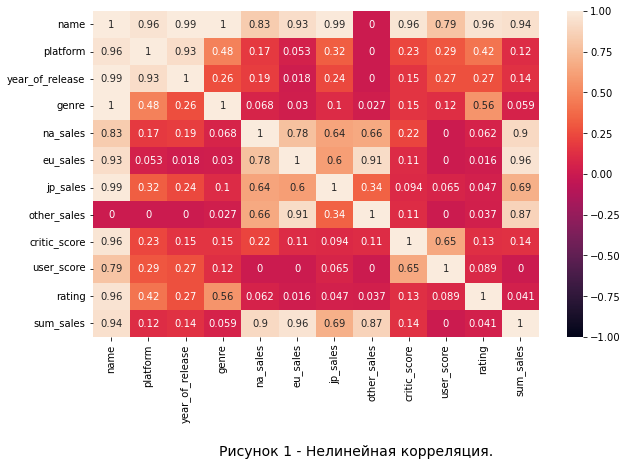

In [ ]:
plt.figure(figsize=(10, 6))
plt.figtext(0.3, -0.15, "Рисунок 1 - Нелинейная корреляция.", fontsize=14)
sns.heatmap(phik_overview, vmin=-1, vmax=1, annot=True)

Как мы видемь самая сильная связь почти совсем имеет "названия игр" кроме "продажи в других странах". При этом "продажи в других странах" и "продажи в Европе" связаны сильно. А так же мы видим сильную связь между платформами и годами выходи игр.
А вот связь между рейтингами и продажами почти не проглядывается.

#### 1.8. <a name="1.8.">Удаление пустых строк</a>

Удалим строки в которых нет значений в названии игр (name) и жанр игр (genre).

In [ ]:
games = games.dropna(subset = ['name'])

### 2. <a name="2">Исследовательский анализ данных</a>

#### <a name="2.1.">2.1. Количество игр, выпущенных в разные годы</a>

In [ ]:
games.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

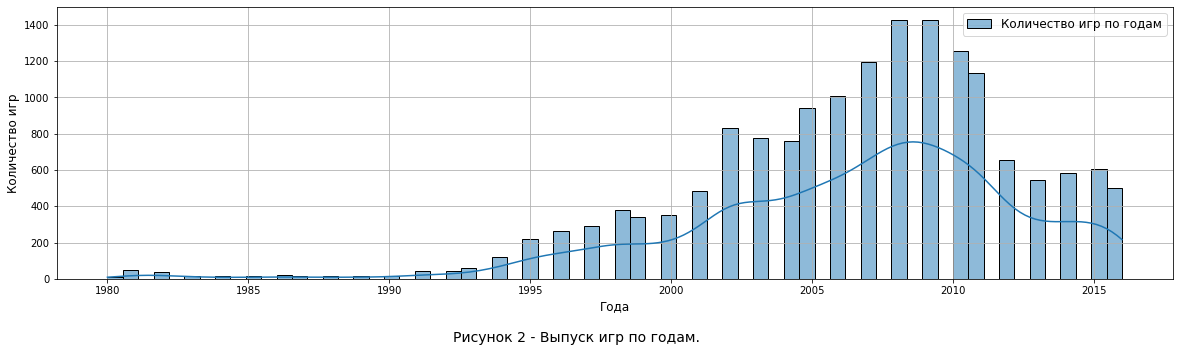

In [ ]:
plt.subplots(figsize=(20, 5))
sns.histplot(data=games, x = "year_of_release", kde=True, label='Количество игр по годам')
plt.legend(fontsize=12)
plt.grid(which='major')
plt.figtext(0.4, -0.05, "Рисунок 2 - Выпуск игр по годам.", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Количество игр", fontsize=12);

По рассматриваемым данным мы видим, что в период с 2002 по 2011 годы выпускалось больше всего игр.

Определить, как менялись продажи по платформам.

#### <a name="2.2.">2.2. Платформы с наибольшими суммарными продажами</a>

In [ ]:
games_groupby = games.groupby('platform')['sum_sales'].sum().sort_values(ascending = False)
games_groupby


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

Платформы с наибольшими суммарными продажами являются PS2(PlayStation 2, 6 поколение, начало продаж 2000г., производитель Sony), X360(Xbox 360, поколение, начало продаж 2005г., производитель  Microsoft), PS3(PlayStation 3, 7 поколение, начало продаж 2006г., производитель Sony), Wii(Wii, 7 поколение, начало продаж 2006г., производитель Nintendo), DS(Nintendo DS, 7 поколение, начало продаж 2004г., производитель Nintendo), PS(PlayStation, 5 поколение, начало продаж 1994г., производитель Sony)  
При этом PC (personal computer, Персональный компьютер) занимает 10 место по суммарной продаже игр.

#### <a name="2.3.">2.3. Продажи игр по годам</a>

In [ ]:
games_year = games.groupby('year_of_release')['sum_sales'].sum()
games_year

year_of_release
1980.0     11.38
1981.0     35.68
1982.0     28.88
1983.0     16.80
1984.0     50.35
1985.0     53.95
1986.0     37.08
1987.0     21.70
1988.0     47.21
1989.0     73.45
1990.0     49.37
1991.0     32.23
1992.0     76.16
1993.0     45.99
1994.0     79.23
1995.0     88.12
1996.0    199.15
1997.0    201.07
1998.0    256.31
1999.0    251.11
2000.0    201.66
2001.0    331.46
2002.0    394.97
2003.0    357.54
2004.0    418.68
2005.0    457.82
2006.0    517.71
2007.0    604.75
2008.0    671.50
2009.0    658.82
2010.0    590.13
2011.0    507.58
2012.0    355.84
2013.0    361.24
2014.0    331.53
2015.0    267.98
2016.0    129.94
Name: sum_sales, dtype: float64

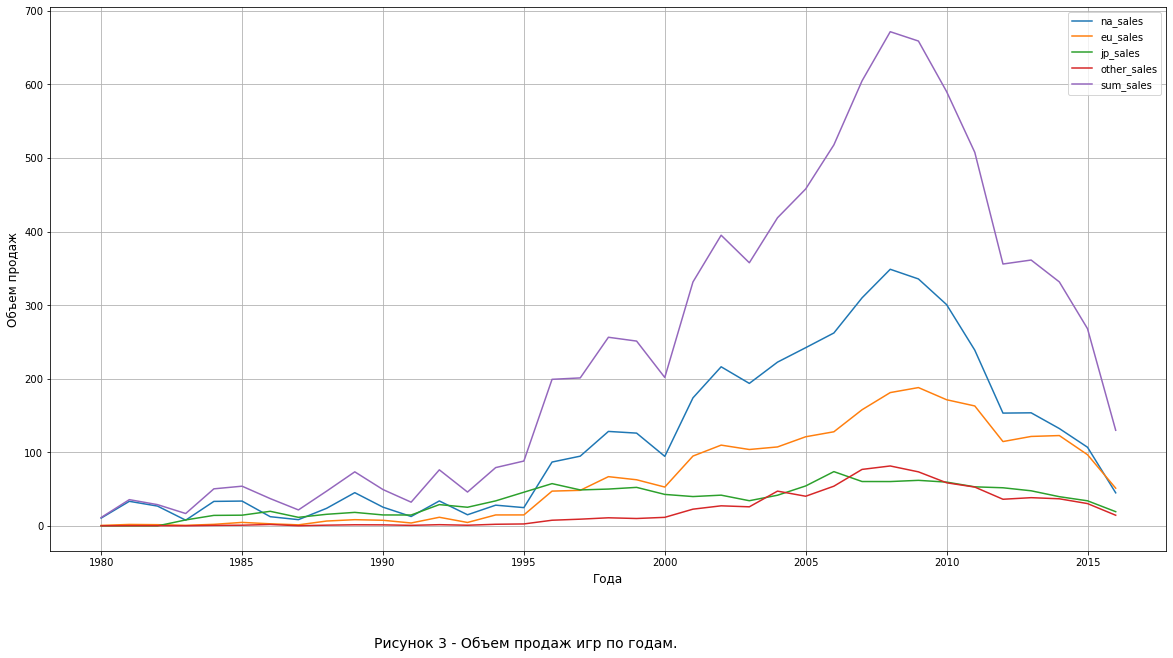

In [ ]:
games.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']].sum().plot(figsize=(20, 10))
plt.grid(which='major')
plt.figtext(0.35, -0.01, "Рисунок 3 - Объем продаж игр по годам.", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Объем продаж", fontsize=12);

Пик продаж игр очень близок к пику выходи игр.

#### <a name="2.4.">2.4. Как менялись продажи по платформам</a>

Рассмотрим продажи на разных платформах.
Так как пик выхода игр приходится на период с 2000 по 2012 годы этим периодом и будет апеллировать.

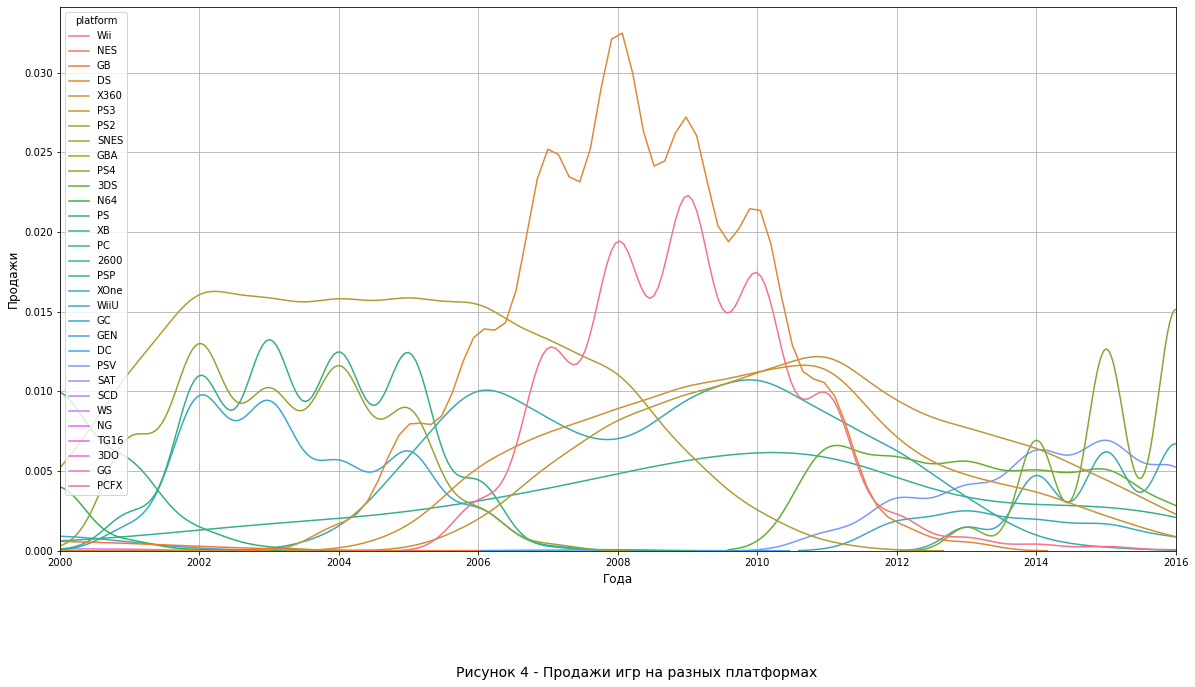

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.kdeplot(data=games,
            x='year_of_release',
            hue='platform',
            warn_singular=False)
plt.xlim(2000, 2016)
plt.grid(which='major')
plt.figtext(0.4, -0.05, "Рисунок 4 - Продажи игр на разных платформах", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

Как видно из графика часть платформ прекращают продавать, а какие-то только начинают. Это связано с выходом новых поколений и прекращение производства устаревших моделей.

#### <a name="2.5.">2.5. За какой характерный срок появляются новые и исчезают старые платформы</a>

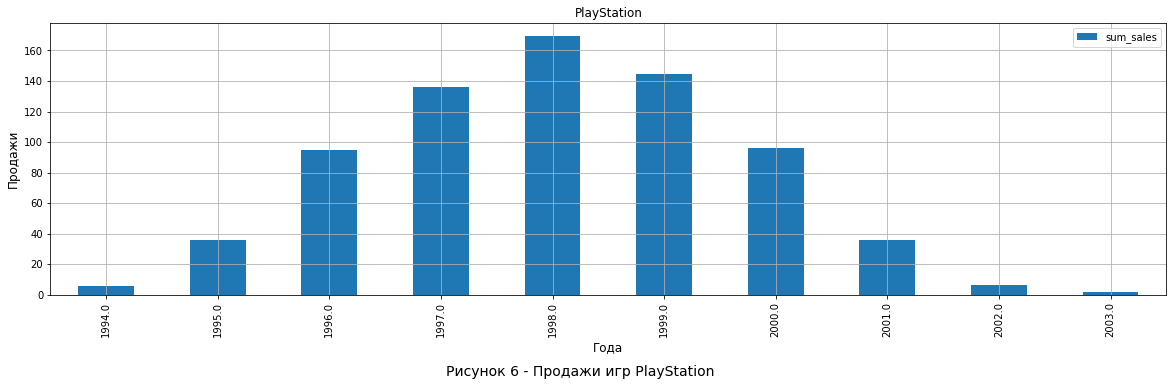

In [ ]:
(games
    .query('platform=="PS"and year_of_release!=0')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(20, 5), label='Количество игр по годам')
)
plt.title('PlayStation')
plt.figtext(0.4, -0.1, "Рисунок 6 - Продажи игр PlayStation", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

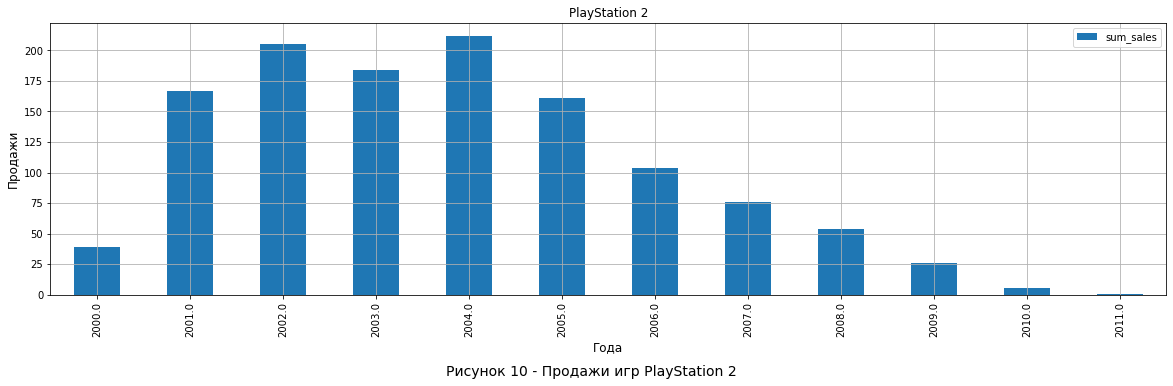

In [ ]:
(games
    .query('platform=="PS2"and year_of_release!=0')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(20, 5), label='Количество игр по годам')
)
plt.title('PlayStation 2')
plt.figtext(0.4, -0.1, "Рисунок 10 - Продажи игр PlayStation 2", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

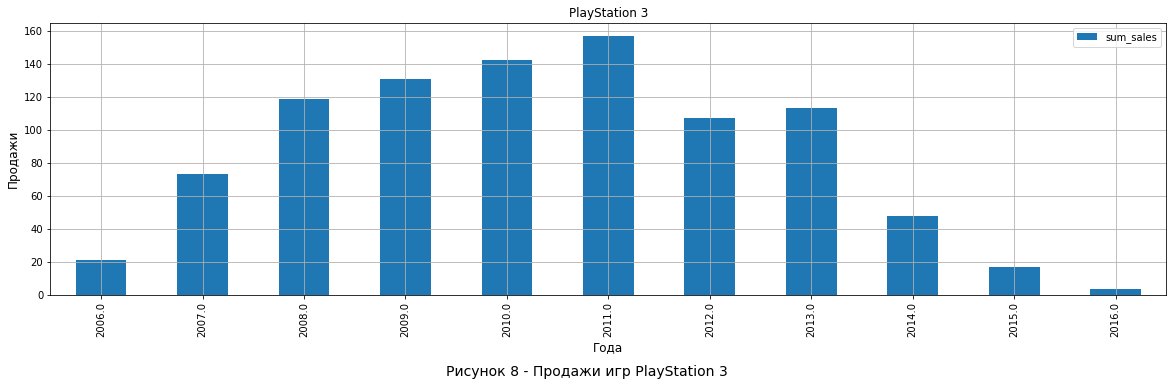

In [ ]:
(games
    .query('platform=="PS3"and year_of_release!=0')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(20, 5), label='Количество игр по годам')
)
plt.title('PlayStation 3')
plt.figtext(0.4, -0.1, "Рисунок 8 - Продажи игр PlayStation 3", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

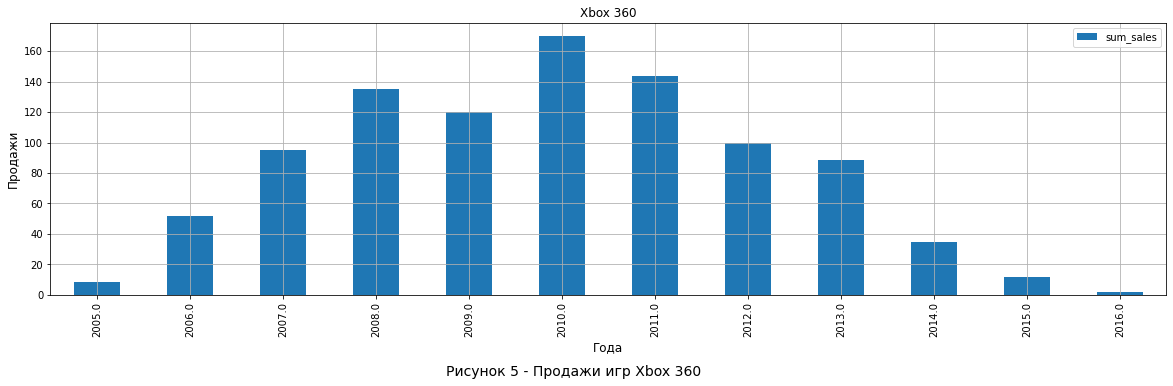

In [ ]:
(games
    .query('platform=="X360"and year_of_release!=0')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(20, 5), label='Количество игр по годам')
)
plt.title('Xbox 360')
plt.figtext(0.4, -0.1, "Рисунок 5 - Продажи игр Xbox 360", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

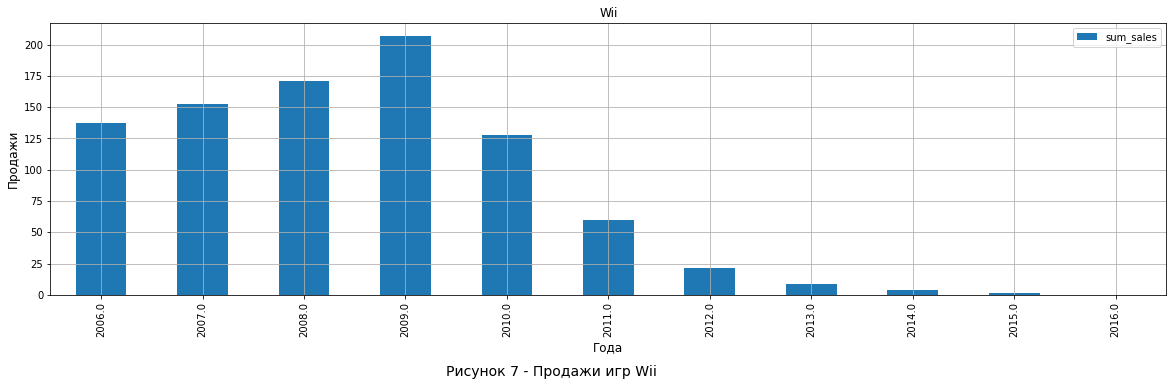

In [ ]:
(games
    .query('platform=="Wii"and year_of_release!=0')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(20, 5), label='Количество игр по годам')
)
plt.title('Wii')
plt.figtext(0.4, -0.1, "Рисунок 7 - Продажи игр Wii", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

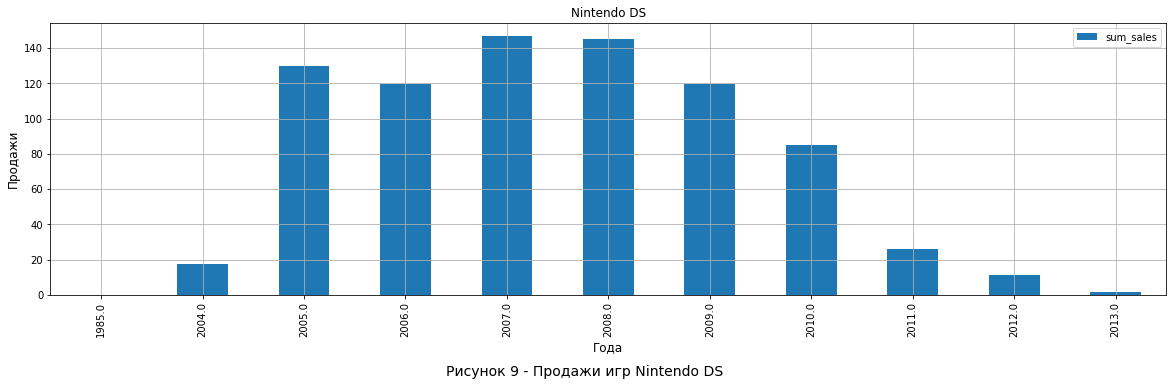

In [ ]:
(games
    .query('platform=="DS"and year_of_release!=0')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(20, 5), label='Количество игр по годам')
)
plt.title('Nintendo DS')
plt.figtext(0.4, -0.1, "Рисунок 9 - Продажи игр Nintendo DS", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

в Nintendo DS 1985 год явная ошибка. Приставка вышла в 2004 году.
Проверим что заложено в таблице

In [ ]:
games.loc[(games['year_of_release'] == 1985.0) & (games['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Сдесь действительно ошибка. Игра Strongest Tokyo University Shogi DS вишла в 2010 году. заменим 1985 на 2010.

In [ ]:
mask = games.query('name == "Strongest Tokyo University Shogi DS" and year_of_release == 1985').index
games.loc[mask, 'year_of_release'] = '2010'

In [ ]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,release_year
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,NaN


In [ ]:
games.loc[(games['year_of_release'] == 2010.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,release_year
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82,NaN
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13,NaN
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62,NaN
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63,NaN
54,Gran Turismo 5,PS3,2010.0,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16569,The Eye of Judgment: Legends,PSP,2010.0,Strategy,0.00,0.00,0.01,0.00,69.0,7.9,E10+,0.01,NaN
16579,Ishin no Arashi: Shippuu Ryuumeden,DS,2010.0,Strategy,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16588,Slotter Mania P: Tetsuya Shinjuku vs Ueno,PSP,2010.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16602,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010.0,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,NaN


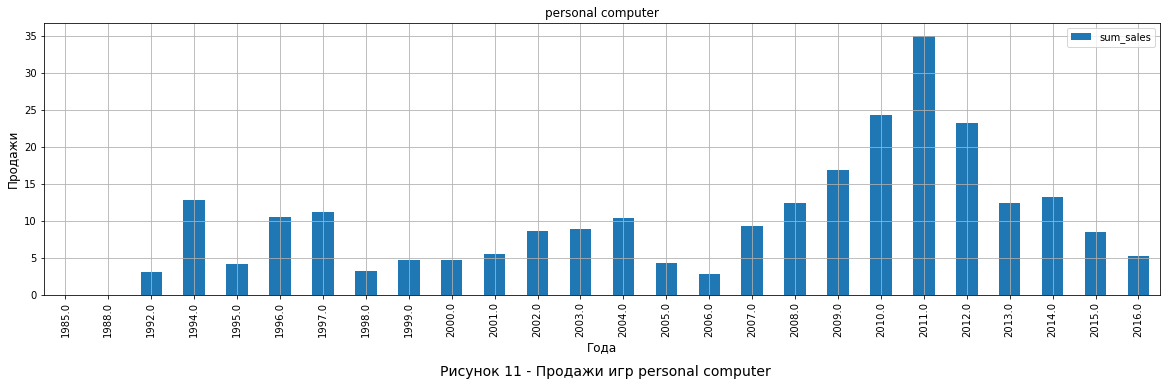

In [ ]:
(games
    .query('platform=="PC"and year_of_release!=0')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(20, 5), label='Количество игр по годам')
)
plt.title('personal computer')
plt.figtext(0.4, -0.1, "Рисунок 11 - Продажи игр personal computer", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

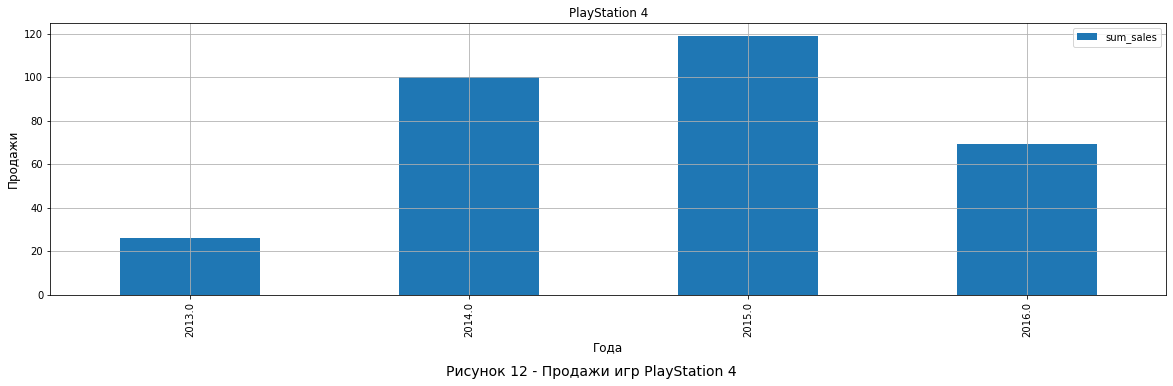

In [ ]:
(games
    .query('platform=="PS4"and year_of_release!=0')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(20, 5), label='Количество игр по годам')
)
plt.title('PlayStation 4')
plt.figtext(0.4, -0.1, "Рисунок 12 - Продажи игр PlayStation 4", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

In [ ]:
#1
PS=games.query('platform=="PS"and year_of_release!=0')
PS_min=PS['year_of_release'].min()
PS_max=PS['year_of_release'].max()
PS_diff=PS_max-PS_min
print(PS_diff)
#2
PS2=games.query('platform=="PS2"and year_of_release!=0')
PS2_min=PS2['year_of_release'].min()
PS2_max=PS2['year_of_release'].max()
PS2_diff=PS2_max-PS2_min
print(PS2_diff)
#3
PS3=games.query('platform=="PS3"and year_of_release!=0')
PS3_min=PS3['year_of_release'].min()
PS3_max=PS3['year_of_release'].max()
PS3_diff=PS3_max-PS3_min
print(PS3_diff)
#4
X360=games.query('platform=="X360"and year_of_release!=0')
X360_min=X360['year_of_release'].min()
X360_max=X360['year_of_release'].max()
X360_diff=X360_max-X360_min
print(X360_diff)
#5
Wii=games.query('platform=="Wii"and year_of_release!=0')
Wii_min=Wii['year_of_release'].min()
Wii_max=Wii['year_of_release'].max()
Wii_diff=Wii_max-Wii_min
print(Wii_diff)
#6
DS=games.query('platform=="DS"and year_of_release > 1985')
DS_min=DS['year_of_release'].min()
DS_max=DS['year_of_release'].max()
DS_diff=DS_max-DS_min
print(DS_diff)

mean=(PS_diff+PS2_diff+PS3_diff+X360_diff+Wii_diff+DS_diff)/6
print('Среднее время жизни платформы: ',mean, 'лет.')

9.0
11.0
10.0
11.0
10.0
9.0
Среднее время жизни платформы:  10.0 лет.


На гафиках с 5 по 12 мы видим что 6 самых продоваемых плотформ продовались в среднем 10 лет. 
При этом в связи с тем что Персональный компьютер не разбивался на поколения продажи игр были начиная с 1985 по 2016 годы.
А так как PlayStation 4 вышла в 2013 году и за 3 года не успела выйти на свой максимальный результат.

В лидиры по продажам входят платформы 7 покаления, времянной период с 2005 по 2010 годы и на их замену с 2011 года начинают выходить платфоры 8 поколения и соответственно за ними будующее.

#### <a name="2.6.">2.6. Ящики с усами по продажам игр на разных платформах</a>

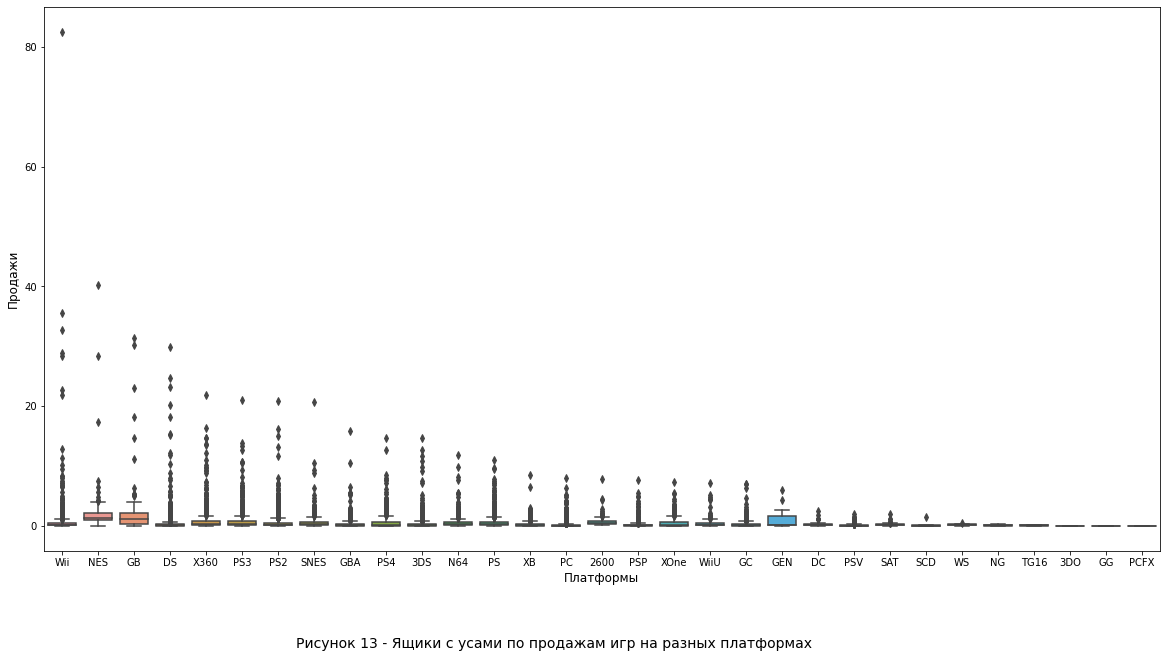

In [ ]:
sns.boxplot(x='platform',
            y='sum_sales',
            data=games)
plt.figtext(0.3, -0.01, "Рисунок 13 - Ящики с усами по продажам игр на разных платформах", fontsize=14)
plt.xlabel("Платформы", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

Есть большой выброс по Wii

In [ ]:
games.loc[(games['platform'] == 'Wii')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16589,Bomberman,Wii,2008.0,Puzzle,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16626,The Ultimate Battle of the Sexes,Wii,2010.0,Misc,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16664,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007.0,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Как мы видем выброс приходится на игру Wii Sports, но известно что эта игра во всем мире была продана свыше 41 миллиона копий. И этот выброс нельзя считать ошибкой. А так же ряд игр таких как Mario Kart Wii так же принесли создателям большие прибыли. 

Посмотрим так же на NES

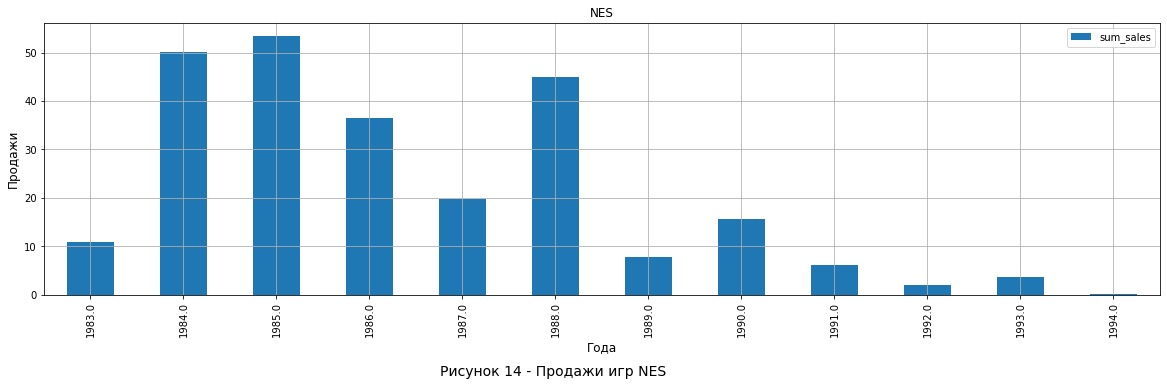

In [ ]:
(games
    .query('platform=="NES"and year_of_release!=0')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(20, 5), label='Количество игр по годам')
)
plt.title('NES')
plt.figtext(0.4, -0.1, "Рисунок 14 - Продажи игр NES", fontsize=14)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

Выбрасы вероятно связаны с тем что платформа была популярна в 1984-1988 годах, а потом потеряла свою популярность.

### 3. <a name="3">Портрет пользователя</a>

#### <a name="3.1.">3.1. Популярные жанры и возрастные группы на разных платформах</a>

Text(0.39, 0.1, 'Рисунок 15 - распределение игр по жанрам на Wii')

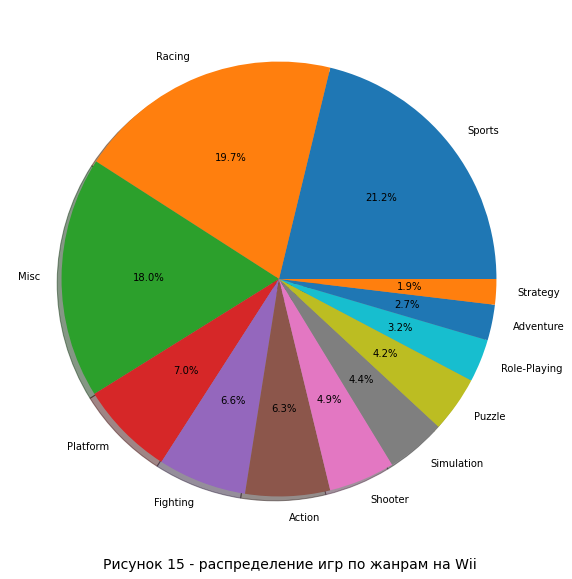

In [ ]:
Wii_games = games.loc[games['platform'] == "Wii"]
plt.pie(Wii_games.genre.value_counts(), 
            labels = Wii_games.genre.unique(), 
            autopct='%1.1f%%',
            shadow=True)
plt.figtext(0.39, 0.1, "Рисунок 15 - распределение игр по жанрам на Wii", fontsize=14)

Text(0.43, 0.1, 'Рисунок 16 - возрастной рейтинг на Wii')

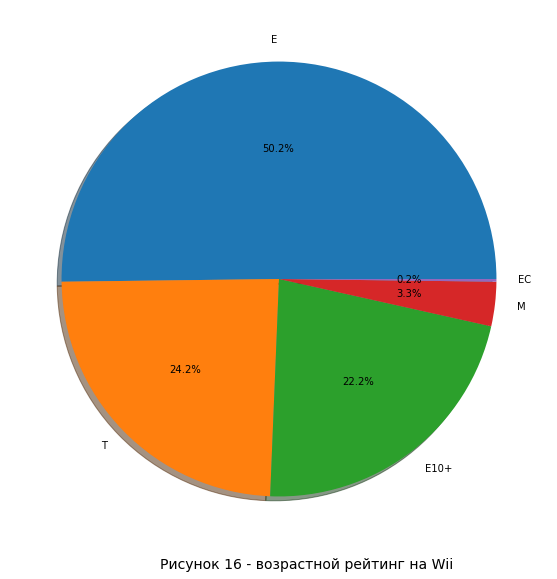

In [ ]:
lbs = Wii_games.rating.dropna().unique()

plt.pie(Wii_games.rating.value_counts(),
           labels = lbs,
           autopct='%1.1f%%',
           shadow=True)
plt.figtext(0.43, 0.1, "Рисунок 16 - возрастной рейтинг на Wii", fontsize=14)

Text(0.39, 0.1, 'Рисунок 17 - распределение игр по жанрам на PS3')

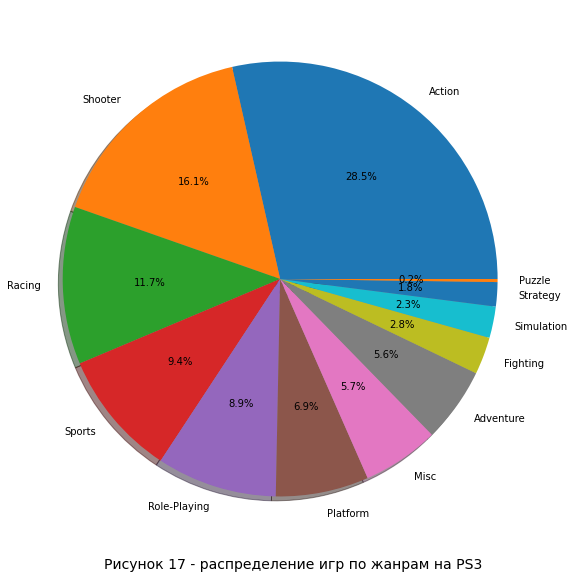

In [ ]:
PS3_games = games.loc[games['platform'] == "PS3"]
plt.pie(PS3_games.genre.value_counts(), 
            labels = PS3_games.genre.unique(), 
            autopct='%1.1f%%',
            shadow=True)
plt.figtext(0.39, 0.1, "Рисунок 17 - распределение игр по жанрам на PS3", fontsize=14)

Text(0.43, 0.1, 'Рисунок 18 - возрастной рейтинг на PS3')

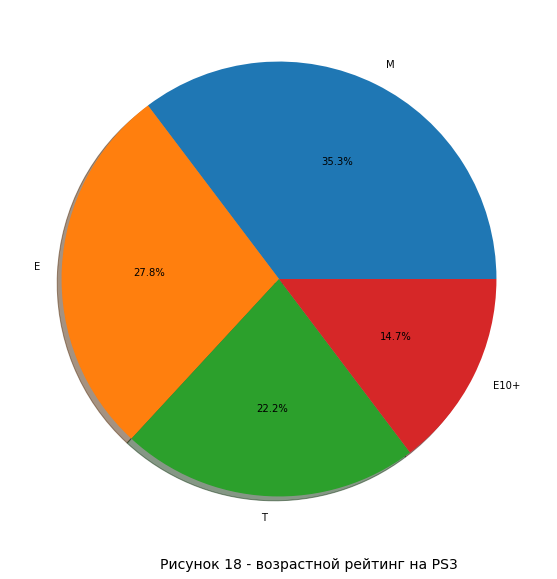

In [ ]:
lbs = PS3_games.rating.dropna().unique()

plt.pie(PS3_games.rating.value_counts(),
           labels = lbs,
           autopct='%1.1f%%',
           shadow=True)
plt.figtext(0.43, 0.1, "Рисунок 18 - возрастной рейтинг на PS3", fontsize=14)

Text(0.39, 0.1, 'Рисунок 19 - распределение игр по жанрам на DS')

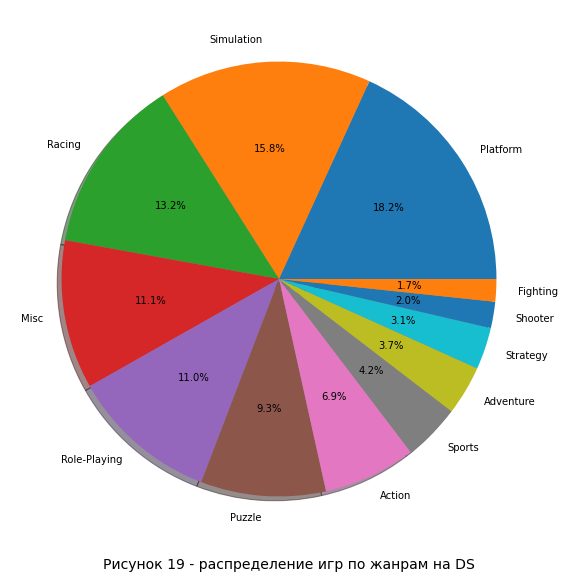

In [ ]:
DS_games = games.loc[games['platform'] == "DS"]
plt.pie(DS_games.genre.value_counts(), 
            labels = DS_games.genre.unique(), 
            autopct='%1.1f%%',
            shadow=True)
plt.figtext(0.39, 0.1, "Рисунок 19 - распределение игр по жанрам на DS", fontsize=14)

Text(0.43, 0.1, 'Рисунок 20 - возрастной рейтинг на DS')

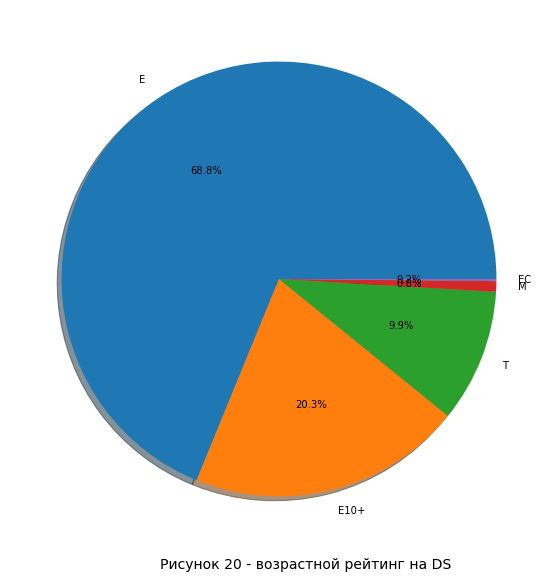

In [ ]:
lbs = DS_games.rating.dropna().unique()

plt.pie(DS_games.rating.value_counts(),
           labels = lbs,
           autopct='%1.1f%%',
           shadow=True)
plt.figtext(0.43, 0.1, "Рисунок 20 - возрастной рейтинг на DS", fontsize=14)

Зделали оценку 3 платформ 7 поколения
Как мы видем самыми являются игры с рейтингами E, T, E10+ и только PS3 выбивается из результатов так как на ней большую долю жанров занимает Action и Shooter, а там много сцен насилия и по этому у игр этого жанра рейтинг для взрослых.
При этом на разных платформах популярны разные жанры, но жанр Racing на всех трех платформах входит в лидирующую группу.

#### <a name="3.2.">3.2. Популярные жанры и возрастные группы X360 в разных регионах</a>

In [ ]:
top_jp = games.loc[(games.jp_sales > games.na_sales) & (games.jp_sales > games.eu_sales) 
                   & (games.jp_sales > games.other_sales)]
top_na = games.loc[(games.na_sales > games.jp_sales) & (games.na_sales > games.eu_sales) 
                   & (games.na_sales > games.other_sales)]
top_eu = games.loc[(games.eu_sales > games.na_sales) & (games.eu_sales > games.jp_sales) 
                   & (games.eu_sales > games.other_sales)]
top_other = games.loc[(games.other_sales > games.eu_sales) & (games.other_sales > games.na_sales) 
                      & (games.other_sales > games.jp_sales)]
print("Игры, которые продавались лучше всего в Японии: " + str(len(top_jp)))
print("Игры, которые продавались лучше всего в Европе: " + str(len(top_eu)))
print("Игры, которые продавались лучше всего в США: " + str(len(top_na)))
print("Игры, которые продавались лучше всего в Других странах: " + str(len(top_other)))


Игры, которые продавались лучше всего в Японии: 4076
Игры, которые продавались лучше всего в Европе: 2322
Игры, которые продавались лучше всего в США: 9865
Игры, которые продавались лучше всего в Других странах: 76


Эти результаты несколько удивительны. Несмотря на то, что в Европе, возможно, самое большое население из трех стран, в Европе меньше всего самых продаваемых игр - чуть более половины от того, что в Японии. Хотя это нам мало что говорит, потенциально это может подсказать что-то о проценте людей, играющих в видеоигры в Европе.

In [ ]:
top_na.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [ ]:
top_jp.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
43,Animal Crossing: Wild World,DS,2005.0,Simulation,2.50,3.45,5.33,0.86,86.0,8.7,E,12.14
65,Final Fantasy VII,PS,1997.0,Role-Playing,3.01,2.47,3.28,0.96,92.0,9.2,T,9.72
73,Animal Crossing: New Leaf,3DS,2012.0,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
76,Super Mario Kart,SNES,1992.0,Racing,3.54,1.24,3.81,0.18,NaN,NaN,NaN,8.77


In [ ]:
top_eu.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E,20.14
26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E,15.28
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [ ]:
top_other.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
268,Metal Gear Solid 3: Snake Eater,PS2,2004.0,Action,1.46,0.00,0.83,1.93,91.0,9.3,M,4.22
349,Pro Evolution Soccer 2008,PS2,2007.0,Sports,0.05,0.00,0.64,2.93,82.0,7.9,E,3.62
436,FIFA Soccer 08,PS2,2007.0,Sports,0.68,0.00,0.00,2.46,83.0,6.5,E,3.14


Как мы видим в разных регионах популярны разные платформы и следовательно разные игры.

#### <a name="3.3.">3.3. Рейтинг ESRB на временной шкале</a>

In [ ]:
cs_counts = games.critic_score.groupby(games.year_of_release).count()
print(cs_counts)

year_of_release
1980.0      0
1981.0      0
1982.0      0
1983.0      0
1984.0      0
1985.0      1
1986.0      0
1987.0      0
1988.0      1
1989.0      0
1990.0      0
1991.0      0
1992.0      1
1993.0      0
1994.0      1
1995.0      0
1996.0      8
1997.0     17
1998.0     28
1999.0     39
2000.0    143
2001.0    326
2002.0    627
2003.0    585
2004.0    561
2005.0    655
2006.0    620
2007.0    692
2008.0    715
2009.0    651
2010.0    500
2011.0    500
2012.0    321
2013.0    273
2014.0    261
2015.0    225
2016.0    232
Name: critic_score, dtype: int64


In [ ]:
Объем продаж, количество выпускаемых игр и количество рейтингов присвоенных играм идентичны.

SyntaxError: invalid syntax (Temp/ipykernel_21740/455352212.py, line 1)

#### <a name="3.4.">3.4. Графики зависимости продаж от оценок</a>

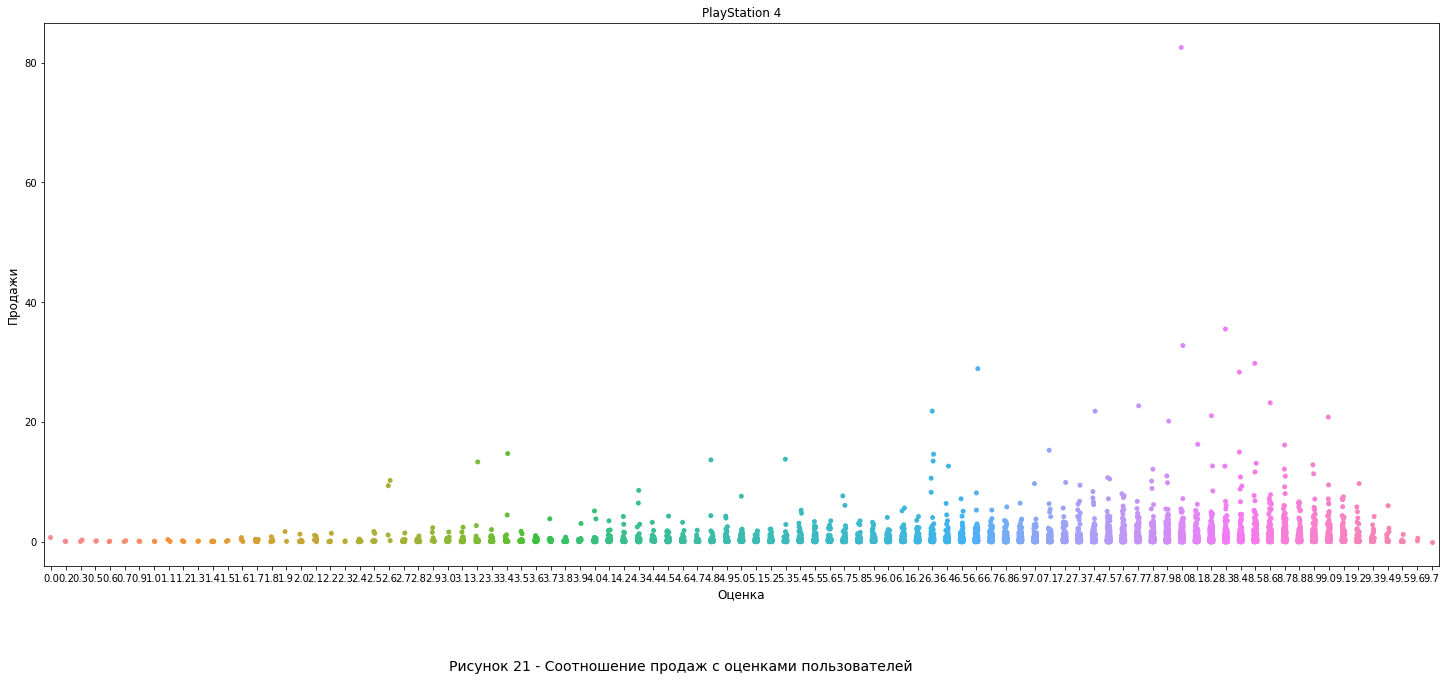

In [ ]:
plt.figure(figsize=(25,10))
sns.stripplot(x = 'user_score', y = 'sum_sales', data = games, jitter = True)
plt.title('PlayStation 4')
plt.figtext(0.35, -0.02, "Рисунок 21 - Соотношение продаж с оценками пользователей", fontsize=14)
plt.xlabel("Оценка", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

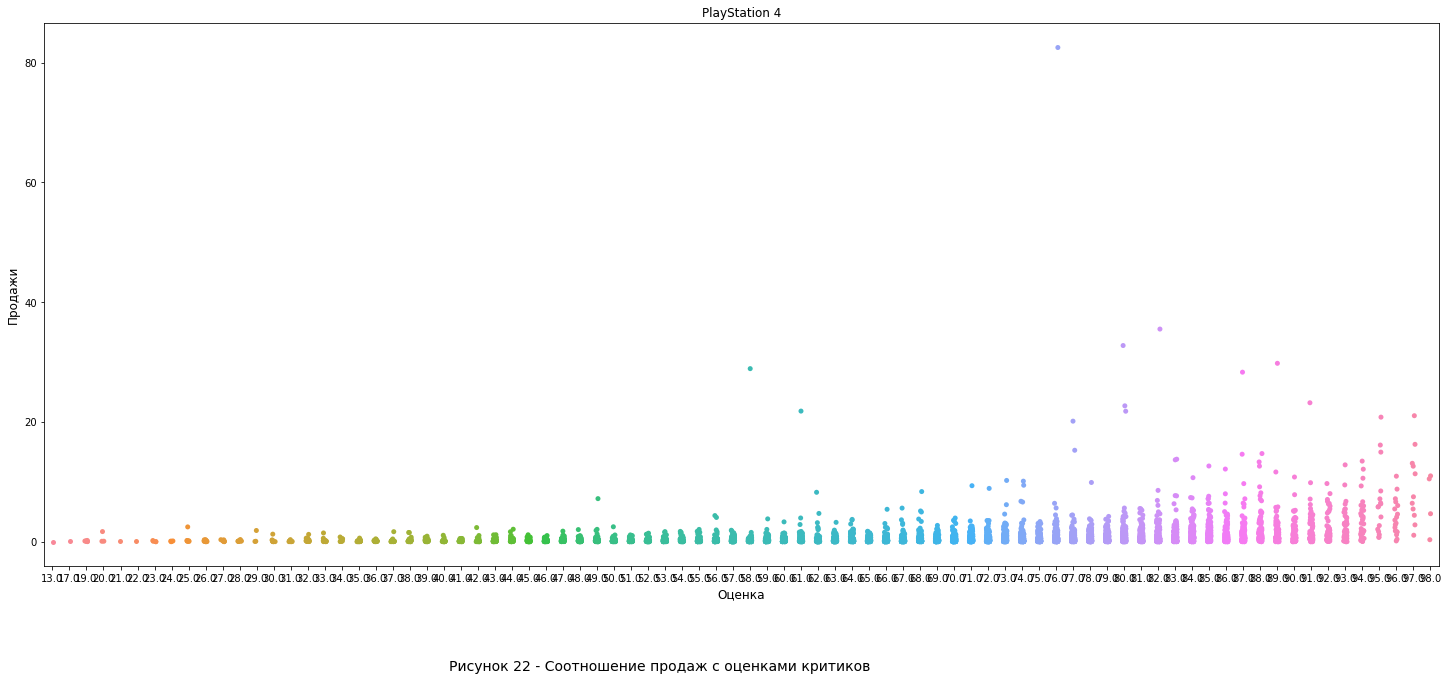

In [ ]:
plt.figure(figsize=(25,10))
sns.stripplot(x = 'critic_score', y = 'sum_sales', data = games, jitter = True)
plt.title('PlayStation 4')
plt.figtext(0.35, -0.02, "Рисунок 22 - Соотношение продаж с оценками критиков", fontsize=14)
plt.xlabel("Оценка", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

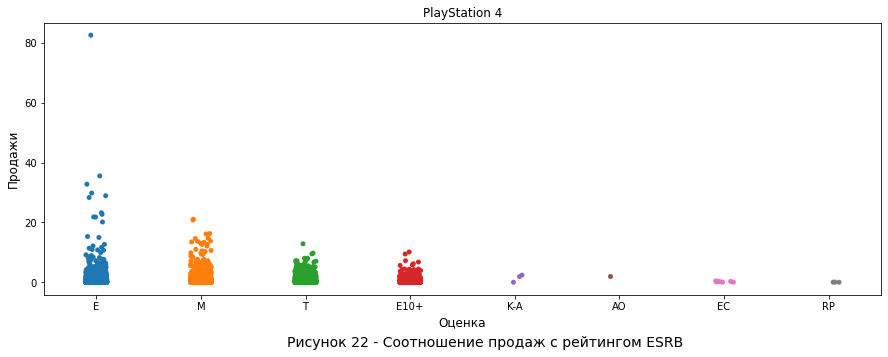

In [ ]:
plt.figure(figsize=(15,5))
sns.stripplot(x = 'rating', y = 'sum_sales', data = games, jitter = True)
plt.title('PlayStation 4')
plt.figtext(0.35, -0.02, "Рисунок 22 - Соотношение продаж с рейтингом ESRB", fontsize=14)
plt.xlabel("Оценка", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

Рейтинги напрямую связаны в спродажами и количеством выпускаемых игр. Определить кто от кого зависит не возможно не знаю что вышло раньше рейтинг, оценка или взлетели продаже и после этого начались появляться оценки и рейтинга.

### 4. <a name="4">Проверка гипотез</a>

H0. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

H1. Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [ ]:
alpha = 0.05
xbox = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
if np.var(xbox)==np.var(pc):
    print('True')
else:
    print('False')

False


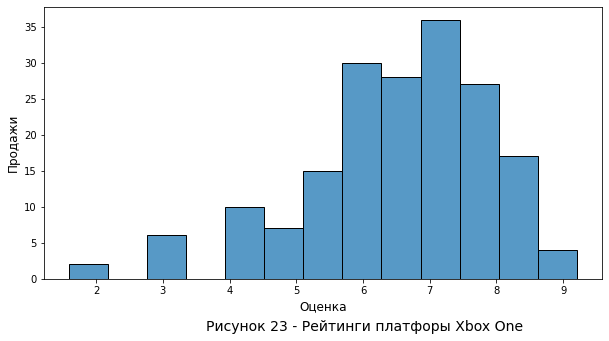

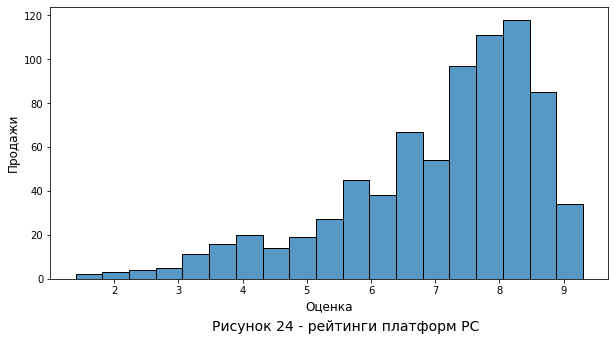

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(xbox)
plt.figtext(0.35, -0.02, "Рисунок 23 - Рейтинги платфоры Xbox One", fontsize=14)
plt.xlabel("Оценка", fontsize=12)
plt.ylabel("Продажи", fontsize=12);
plt.figure(figsize=(10,5))
sns.histplot(pc)
plt.figtext(0.35, -0.02, "Рисунок 24 - рейтинги платформ PC", fontsize=14)
plt.xlabel("Оценка", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

Распределение Гауссовское, используем Т-критерий Стьюдентса, дисперсия выборок не равна.

In [ ]:
results = st.stats.ttest_ind(xbox, pc, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


H0. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковы.

H1. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [ ]:
alpha = 0.05
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
if np.var(action)==np.var(sports):
    print('True')
else:
    print('False')

False


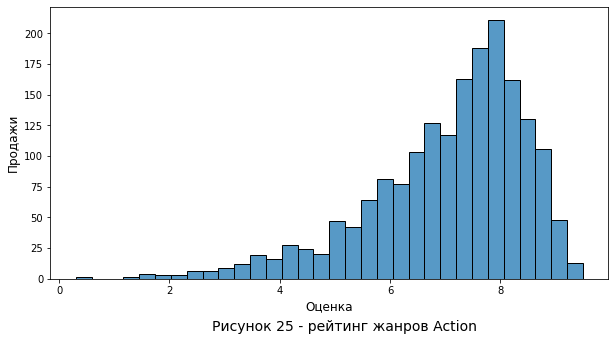

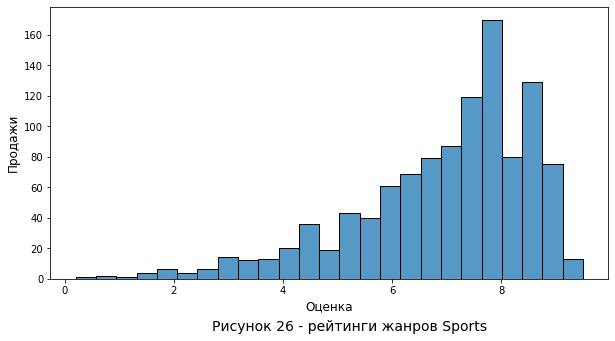

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(action)
plt.figtext(0.35, -0.02, "Рисунок 25 - рейтинг жанров Action", fontsize=14)
plt.xlabel("Оценка", fontsize=12)
plt.ylabel("Продажи", fontsize=12);
plt.figure(figsize=(10,5))
sns.histplot(sports)
plt.figtext(0.35, -0.02, "Рисунок 26 - рейтинги жанров Sports", fontsize=14)
plt.xlabel("Оценка", fontsize=12)
plt.ylabel("Продажи", fontsize=12);

Распределение Гауссовское, используем Т-критерий Стьюдентса, дисперсия выборок не равна.

In [ ]:
results=st.stats.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Вывод: пользовательские рейтинги для платформ Xbox и PC различны. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») тоже различны.

### 5. <a name="5">Выводы</a>

Геймдейв медленно и верно теряет обороты, игры ушли на мобильные устройства. Люди играть в приставки не перестали, поэтому не останавливаются и разработчики, хотя делают это уже более осмотрительно. 

Пятерка самых популярных платформ набрала свою популярность с начала 2000-х. Период от первых продаж до исчезновения продаж в среднем занимает 14 лет. Период для появления платформы и выхода из нее с 1980 до 2000 такой же, как и для платформ с 2000 до 2016, от 9 до 11 лет. Платформа PS трансформировалась в PS2 и PS3. Платформа NES уступила свое место более совершенным SNES с более совершенной приставкой Sega Mega Drive, также как до этого N64 уступила свое место NES. SNES 95 году обещали выпустить новую приставку, несколько раз переносили презентацию, в итоге для новой приставки выпустили 22 игры, все японского производства и платформа перестала существовать. GB были линейкой портативных устройств от компании Nintendo (N64, NES, SNES), с уходом Nintendo с рынка исчезли и GB. Период для появления платформы и выхода из нее с 1980 до 2000 меньше, чем для платформ с 2000 до 2016, и составляет 10,4 года. Платформа PS трансформировалась в PS2 и PS3. Платформа NES уступила свое место более совершенным SNES с более совершенной приставкой Sega Mega Drive, также как до этого N64 уступила свое место NES. SNES 95 году обещали выпустить новую приставку, несколько раз переносили презентацию, в итоге для новой приставки выпустили 22 игры, все японского производства и платформа перестала существовать. GB были линейкой портативных устройств от компании Nintendo (N64, NES, SNES), с уходом Nintendo с рынка исчезли и GB.  Нормально распределены данные за период с 2003 по 2015 год, их используем в дальнейшей работе. Потенциально прибыльны платформы PS4, X360 и XOne, что неудивительно, потому что это мастодонты рынка. 

От уровня оценки прямо пропорционально зависят продажи, и не важно оценил игру пользователь или критик. А также самые дорогие продажи приходятся на самые высокие оценки критиков. Жанры для игр в Северной Америке, Европе и Японии популярны одни и те же, а вот игровые платформы у японцев значительно отличаются. В разы различаются и продажи в этих регионах: больше всего продаж в Северной Америке, меньше всего в Японии. Предполагаю, что связано это с разным менталитетом этих регионов. Зависимость от рейтинга отслеживается во всех трех регионах. Наиболее популярны игры с рейтингом "для всех", "подросткам","детям старше 10 лет" и "для взрослых"(в Европе и Северной Америке спрос на них выше, японцы больше предпочитают игры без определенного рейтинга). Ситуация в Японии связана с тем, что получить возрастной рейтинг на японском рынке сложно и дорого. Начинает это с того, что всё общение и вся документация — на японском языке. «Google Переводчиком» в данной ситуации пользоваться не стоит, лучше найти человека со знанием языка или студию локализации. 

Есть 2 варианта для построения отношений: 

* разовый платёж. Вы хотите единожды сделать рейтинг для одной игры и на одну (или несколько) платформу — стоило это на 2018 год примерно 2 тысячи евро. 
* членство. У вас есть как вступительный взнос, так и взнос за каждую игру, но цена за оценку игры ниже, чем разовая оценка в первом варианте. То есть в перспективе, если вы планируйте делать 5-7 релизов и на 3-4 платформы, вам стоит рассмотреть и членство в данном агентстве. 

В большинстве жанров оценок и критиков, и пользователей после 2007 года уменьшилось. Связано это с тем, что рынок игр в то время было принято хоронить, игры ушли на мобильные устройства и ПК, росли продажи только на стратегии и ролевые игры.Оценки критиков и пользователей для большинства жанров разбросаны равномерно. Пользователи оценивают стратегии, спорт и симуляции выше критиков, а критики ценят пазлы больше пользователей.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<center>Список литературы</center>

1. Андерсон, К, Аналитическая культура: от сбора данных до бизнес-результатов / Карл Андерсон. - Москва : Манн, Иванов и Фербер, 2017. - 324 с.
2. Бенгфорт Бенджамин, Билбро Ребекка, Охеда Тони, Прикладной анализ текстовых данных на Python. Машинное обучение и создание приложений обработки естественного языка. — СПб.: Питер, 2019. 
3. Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2017. 
4.  Плас Дж. Вандер, Python для сложных задач: наука о данных и машинное обучение. — СПб.: Питер, 2018.
5. Рашка С., Рашка С. Р28 Python и машинное обучение / пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017.  
6.  Шарден Б., Массарон Л., Боскетти А.,  Крупномасштабное машинное обучение вместе с Python. Пер. с анг. А. В. Логунова. – М.: ДМК Пресс, 2018. 